Importing all the necessary modules.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Before we get started on the data wrangling and cleaning process, here are a few tdefinitions from the world of statistics that
will help with our analysis:

Mode - The mode of a set of data values is the value that appears most often. Let us consider a list, x = [1,2,2,3]. The mode of the list x is 2 since it is the most repeated value.

Median - The median is the value separating the higher half from the lower half of a data sample. Let’s consider a list x = [3,4,5,6,7]. The median of x in this case is 5. For an even number of observations, the average of the two middle observations is computed as the median.

Outliers - An outlier is an observation point that is distant from other observations. These data points could be a result of errors or wrongly recorded observations. These are often excluded from analysis as it could have an adverse effect on the reliability of our model.
We will identify outliers with the help of box plots. A typical box plot with outliers is illustrated below: 

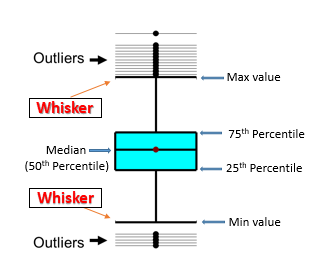

The data points above and below the 'whiskers' are our outliers. The min and max values in this plot have been plotted by excluding the outliers from the calculation. 


In [5]:
data = pd.read_csv('C:\Springboard Capstone Projects\Springboard_Capstone_Projects\Springboard_Capstone_Projects\Springboard_Capstone_Project_1\Data\\train_data.csv')

In [6]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


Observing the data in general to identify columns (variables) with missing values.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Filling the missing values for loan amount with the mean of the loan amount.

In [9]:
mean_loan_amt = data['LoanAmount'].mean()

In [10]:
data['LoanAmount'] = data['LoanAmount'].fillna(mean_loan_amt)

We will now observe the box plot for LoanAmount to identify outliers. Then, we will analyze these outliers and decide if these data points should be omitted or not.

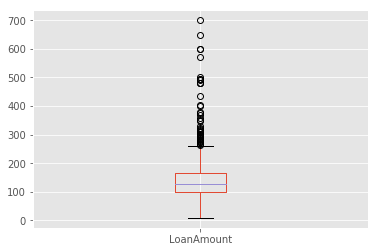

In [11]:
data['LoanAmount'].plot(kind = 'box')

The box plot shows quite a few outliers. We see that some outliers over 500 (illustrated beside the box plot) that are pretty isolated. We find 3 data points in the 600s and one at 700. From the datafram below, we see that only a total of 5 applicants have applied for loan amounts over 500. 

In [12]:
data.loc[data['LoanAmount'] > 500]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y


Couse of action with outliers : These data points will be part of the analysis.

Next, the loan_amount_term value will be filled. Let us compute the mode of the Loan_Amount term  variable.

In [13]:
mode_loan_term = data.Loan_Amount_Term.mode()
mode_loan_term

0    360.0
dtype: float64

Now let us explore how many data points have the value '360.0'

In [90]:
len(data.loc[data.Loan_Amount_Term == 360.0])

512

Since 512/614 data points have the value 360, the missing values for loan_amount_term column will be filled with the mode.

In [10]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data['Loan_Amount_Term'].mode()[0])

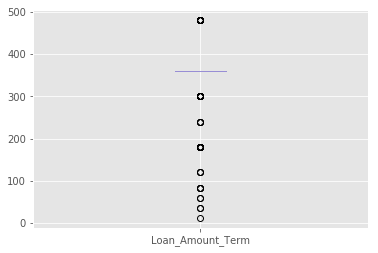

In [36]:
data['Loan_Amount_Term'].plot(kind = 'box')

We see from the plot above that there is one data point > 360. On pulling values from the dataframe for Loan_Amount_term > 360, we observe that there quite a few applicants and considering the relatively small size of this dataset, these data points will be taken into consideration for analysis

In [37]:
data.loc[data.Loan_Amount_Term > 360]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,LP001255,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1.0,Urban,N
109,LP001384,Male,Yes,3,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,0.0,Urban,Y
168,LP001579,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
179,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
228,LP001760,Male,Yes,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
248,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,0,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
298,LP001955,Female,No,0,Graduate,No,5000,2541.0,151.0,480.0,1.0,Rural,N
358,LP002158,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N


Determining the number of applicants with Loan_Amount_Term < 100. We only get 9, a pretty small number.  There are four data points below or equal to 60. None of these data points will be dropped from analysis.

In [38]:
data.loc[data.Loan_Amount_Term < 100]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
68,LP001238,Male,Yes,3,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
262,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
313,LP002008,Male,Yes,2,Graduate,Yes,5746,0.0,144.0,84.0,0.0,Rural,Y
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,0.0,Urban,Y
546,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.0,36.0,1.0,Semiurban,N
575,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.0,84.0,1.0,Urban,Y
585,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N


Next, the empty values of the dependents column will be filled with the mode.

Defined a function to convert values '3+' in Dependents to '3'

In [16]:
def gender_convert(x):
    if x == '3+':
        return '3'
    else:
        return x        

Applying the above defined function to the dependents column.

In [17]:
data['Dependents'] = data['Dependents'].apply(gender_convert)

Now, the null values will be filled with the mode

In [20]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

The dependents column will now be converted to numeric type.

In [21]:
data['Dependents'] = pd.to_numeric(data['Dependents'])

Next, the Credit_History column will be filled with the 0 for NaN values.

In [23]:
data['Credit_History'] = data['Credit_History'].fillna(0.0)

On to the self_employed column next

In [24]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

Moving on to the married column

In [25]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

Lastly, we have the Gender column. These will be filled with 'Other' for NaN values.

In [26]:
data['Gender'] = data['Gender'].fillna('Other')

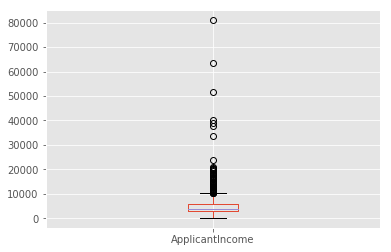

In [27]:
data['ApplicantIncome'].plot(kind = 'box')

By observing the box plot for applicant incomes, we again see quite a few outliers. But as before, we will keep these values
and not ignore them for analysis. We see three data points located above 50,000

In [28]:
data.loc[data['ApplicantIncome'] >= 50000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Other,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


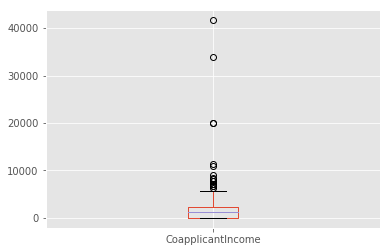

In [32]:
data['CoapplicantIncome'].plot(kind = 'box')

On observing the box plot above, we again see quite a few outliers but most of them are located close to the box plot. However, 
there are three data points that appear to be pretty isolated. These data points will be considered for analysis. Below is a
snapshot of the some of the outliers.

In [33]:
data.loc[data['CoapplicantIncome'] > 18000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,LP002949,Female,No,3,Graduate,No,416,41667.0,350.0,180.0,0.0,Urban,N


We see only 4 rows whereby the value exceeds 18,000. However, all these will be considered for analysis.

Verifying to see if that there are missing dataframes.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null int64
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB
